In [62]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h), int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

y1  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags1.txt")
y2  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags2.txt")
y3  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags3.txt")
y4  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags4.txt")
y5  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags5.txt")
y6  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags6.txt")
y7  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags7.txt")
y8  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags8.txt")
y9  = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags9.txt")
y11 = MakeDataFromText("Yoel 5th/Cold weather Run by Yoel 5th Feb/tags.txt")

# Combine all data into one dictionary
combined = dict()
for d in [ y1, y2, y3, y4, y5, y6, y7, y8, y9, y11 ]:
    for k,v in d.items():
        if k in combined:                                 # if tag is already in dict
            for i in range(len(v[0])):                    # iterate over all time points
                if v[0][i] in combined[k]:                # if time point is already in dict
                    combined[k][v[0][i]].append(v[1][i])
                else:                                     # if time point is not in dict
                    combined[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]
for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2) # avg all points taken during the same second

In [63]:
shirt_inner = {
    "9C54" : "Inner BN", # Shirt 15
    "9968" : "Inner B",
    "65E1" : "Inner C",
    "5E23" : "Inner Ab L",
    "ACB3" : "Inner Ab R",
    "7AD3" : "Inner AUR",
    "99A1" : "Inner ALR",
    "B19D" : "Inner ALL",
    "43C6" : "Inner AUL",
}

shirt_outer = {
    "71BB" : "Outer BN",  # Shirt 6
    "7705" : "Outer B", 
    "B25E" : "Outer C", 
    "3247" : "Outer Ab L", 
    "A9B5" : "Outer Ab R",
    "6C38" : "Outer AUR",
    "7662" : "Outer ALR", 
    "A983" : "Outer ALL", 
    "098F" : "Outer AUL",
}

shirt_mark_inner = {
    "9C54" : "o", # Shirt 15
    "9968" : "v",
    "65E1" : "^",
    "5E23" : "1",
    "ACB3" : "8",
    "7AD3" : "s",
    "99A1" : "p",
    "B19D" : "*",
    "43C6" : "d",
}

shirt_mark_outer = {
    "71BB" : "o", # Shirt 6
    "7705" : "v",
    "B25E" : "^",
    "3247" : "1",
    "A9B5" : "8",
    "6C38" : "s",
    "7662" : "p",
    "A983" : "*",
    "098F" : "d",
}

In [64]:
iii = []
for k,v in combined.items():
    epc = k[-4:]
    s = sorted( v.items() )

    if epc in shirt_outer.keys():
        iii.append ([shirt_outer[epc], len( [ j[1] for j in s ] )] )
    # else:
    #     print("ERROR: EPC not found in dictionary!")

def Sort(sub_li):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    sub_li.sort(key = lambda x: x[1], reverse=True)
    return sub_li

iii = Sort(iii)
print("# of reads Outer Shirt \nfor Yoel's 5th Run", "\n")
for i in iii:
    print(i)

# of reads Outer Shirt 
for Yoel's 5th Run 

['Outer AUR', 1377]
['Outer C', 1195]
['Outer ALL', 1166]
['Outer AUL', 1143]
['Outer Ab L', 249]
['Outer ALR', 233]
['Outer B', 62]
['Outer Ab R', 15]


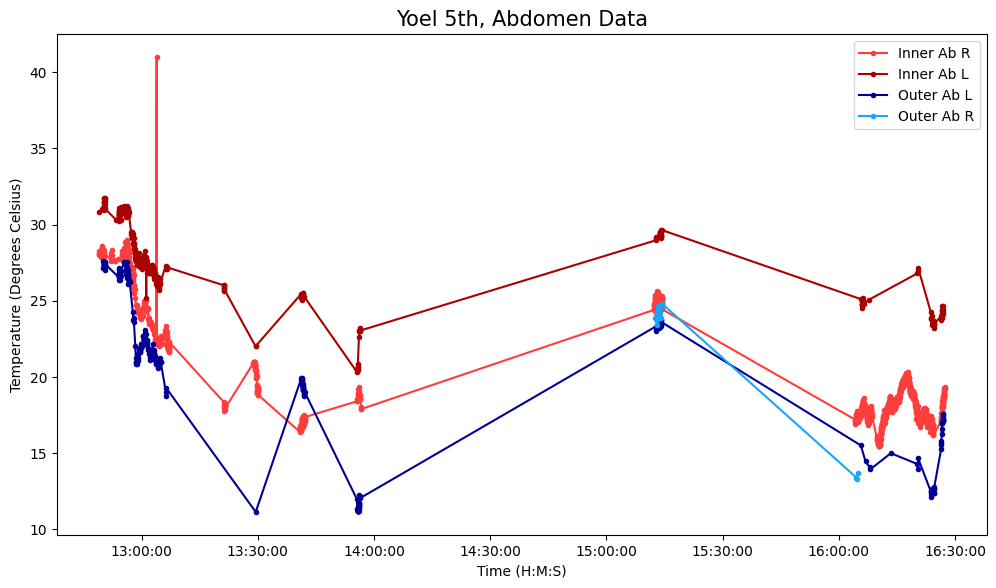

In [65]:
myFmt = mdates.DateFormatter('%H:%M:%S')
fig, ax = plt.subplots(figsize=(12, 6.5))
ax.xaxis.set_major_formatter(myFmt)


for k,v in combined.items():
    epc = k[-4:]
    s = sorted( v.items() )

    time = [ j[0] for j in s ]
    data = [ j[1] for j in s ]

    # time = [ j[0] for j in s if j[0]<datetime.datetime(1970, 2, 1, 14, 0, 0) ]
    # data = [ j[1] for j in s if j[0]<datetime.datetime(1970, 2, 1, 14, 0, 0) ]

    # if epc in shirt_inner.keys():
    #     ax.plot(time, data, label=shirt_inner[epc], marker=shirt_mark_inner[epc], color="#ab0000")
    
    # if epc in shirt_outer.keys():
    #     ax.plot(time, data, label=shirt_outer[epc], marker=shirt_mark_outer[epc], color="#020094")

    # if epc == "65E1": ax.plot(time, data, label=shirt_inner[epc], marker=".", color="#db3609")
    # if epc == "B25E": ax.plot(time, data, label=shirt_outer[epc], marker=".", color="#0e54cd")

    # INNER
    if epc == "5E23": ax.plot(time, data, label=shirt_inner[epc], marker=".", color="#ab0000")
    if epc == "ACB3": ax.plot(time, data, label=shirt_inner[epc], marker=".", color="#ff3d3d")

    # OUTER
    if epc == "3247": ax.plot(time, data, label=shirt_outer[epc], marker=".", color="#020094")
    if epc == "A9B5": ax.plot(time, data, label=shirt_outer[epc], marker=".", color="#16a7fa")


ax.set_title("Yoel 5th, Abdomen Data", fontsize=15)
ax.set_xlabel("Time (H:M:S)")
ax.set_ylabel("Temperature (Degrees Celsius)")
ax.legend()